In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("seeds-less-rows.csv")
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [12]:
df.isna().sum()  #checking missing values

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry_coefficient    0
groove_length            0
grain_variety            0
dtype: int64

Text(0, 0.5, 'grain_variety')

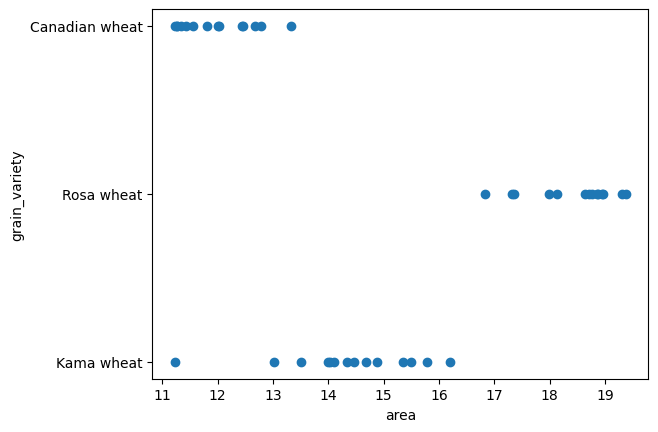

In [13]:
plt.scatter(df.area,df['grain_variety'])
plt.xlabel('area')
plt.ylabel('grain_variety')

In [15]:
km = KMeans(n_clusters=3)
y_predicted =km.fit_predict(df[['area','groove_length']])
y_predicted

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [16]:
df['cluster'] = y_predicted
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety,cluster
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat,2
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat,2
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat,2
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat,2
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat,2


In [17]:
km.cluster_centers_

array([[18.43571429,  5.99021429],
       [11.902     ,  5.051     ],
       [14.62692308,  5.15453846]])

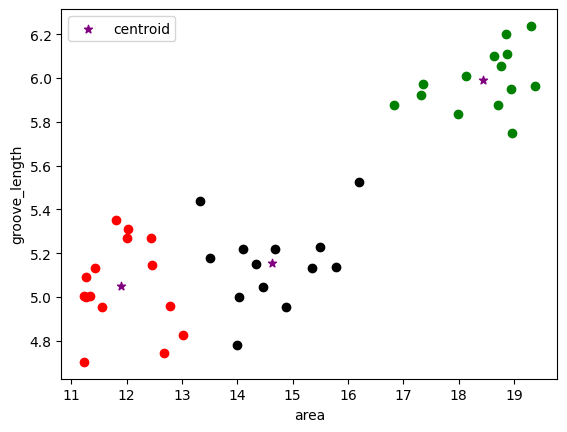

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.area,df1['groove_length'],color ='green')
plt.scatter(df2.area,df2['groove_length'],color ='red')
plt.scatter(df3.area,df3['groove_length'],color ='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color ='purple', marker='*', label ="centroid")
plt.xlabel('area')
plt.ylabel('groove_length')
plt.legend()

In [19]:
scaler = MinMaxScaler()
scaler.fit(df[['groove_length']])
df['groove_length'] = scaler.transform(df[['groove_length']])

scaler.fit(df[['area']])
df['area'] = scaler.transform(df[['area']])

In [22]:
df.head(10)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety,cluster
0,0.447853,14.57,0.8811,5.554,3.333,1.018,0.164821,Kama wheat,2
1,0.424540,14.49,0.8799,5.563,3.259,3.586,0.336156,Kama wheat,2
2,0.343558,14.16,0.8796,5.438,3.201,1.717,0.194137,Kama wheat,2
3,0.338650,13.83,0.9183,5.119,3.383,5.234,0.050814,Kama wheat,2
4,0.353374,14.26,0.8722,5.520,3.168,2.688,0.336156,Kama wheat,2
5,0.219632,13.76,0.8641,5.395,3.026,3.373,0.079479,Kama wheat,1
6,0.522699,14.94,0.8724,5.757,3.371,3.412,0.342020,Kama wheat,2
7,0.609816,15.27,0.8734,5.826,3.464,2.823,0.536808,Kama wheat,2
8,0.278528,13.85,0.8852,5.351,3.158,2.249,0.308143,Kama wheat,2
9,0.506748,14.76,0.8861,5.701,3.393,1.367,0.279479,Kama wheat,2


In [ ]:
km = KMeans(n_clusters=3)$
y_predicted =km.fit_predict(df[['area','groove_length']])
y_predicted

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [25]:
km.cluster_centers_

array([[0.08245399, 0.2267101 ],
       [0.88413672, 0.83857608],
       [0.41680038, 0.29416186]])